# PDAS CA2
***

### Problem statement:
***
Does an increase in electricity generation correlate with negative environmental impacts such as the increase of air pollution levels (PSI) and the climate change such as temperature in Singapore?
***

### Rationale of chosing this problem statement (My story):
***
Understanding the connections between electricity generation, air quality, and climate changes is crucial for informed decision-making in resource allocation, policy formulation, and future planning. This analysis aims to provide insights into how changes in electricity generation may impact air pollution and climate, with potential consequences for the future of our environment. By understanding the relationships between electricity generation, air quality, and climate, stakeholders can develop proactive strategies to mitigate potential environmental risks and enhance overall environmental resilience.
***

### Dataset information:
***

Background Information of the datasets:
- Electricity generation dataset:
    - Theme: Impact on the environment
    - Subject: Energy and environment
    - Topic: Energy generation/consumption
    - Table title: Electricity generation, monthly
    - Data range: 1975-01 to 2023-10
    - Source: https://tablebuilder.singstat.gov.sg/table/TS/M890831

- Historical 24-hr PSI dataset: 
    - Theme: Environment
    - Subject: Environment and pollution
    - Topic: Air pollution/24-hr PSI
    - Table title: Historical24hrPSI
    - Data range: 2014-04 to 2023-01
    - Source: https://beta.data.gov.sg/collections/1380/view

- Surface Air Temperature Monthly Mean dataset:
    - Theme: Environment
    - Subject: Environment and climate change
    - Topic: Surface Temperature
    - Table title: SurfaceAirTemperatureMonthlyMean
    - Data range: 1982-01 to 2023-12
    - Source: https://beta.data.gov.sg/collections/1419/view

***

Notes: Even before we get into analyzing the datasets, just by looking at the csv files as a whole, we can already see some pointers we need to resolve:
- The data range for the datasets are different with the earliest data record at 1975-01 and the latest data record being 2023-12
    - We need to subset the datasets so the range matches. The optimal date range would be 2014-04 to 2023-01
- The columns that representing the time is also in different formats with some naming the months and some being in hours
    - We need to resolve it and change the columns to match each other for easier analysing later on
- The column that represent timeframe are named differently
    - We need to rename the columns that should represent the months into a column called "months" as regression analysis requires a column to be common to work. 
***

### Importing the required libraries and datasets

In [76]:
# Importing the libraries needed for this assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
import seaborn as sns

# Importing all the datasets
electricityGenerationMonthly = pd.read_csv('../PDASCA2_DAAA1B07-2341475-ChoyJeeHungCaleb/Datasets/ElectricityGenerationMonthly.csv')
historical24hrPSI = pd.read_csv('../PDASCA2_DAAA1B07-2341475-ChoyJeeHungCaleb/Datasets/Historical24hrPSI.csv')
surfaceAirTemperatureMonthlyMean = pd.read_csv('../PDASCA2_DAAA1B07-2341475-ChoyJeeHungCaleb/Datasets/SurfaceAirTemperatureMonthlyMean.csv')
AirTemperatureAndSunshineRelativeHumidityAndRainfallMonthly = pd.read_csv('../PDASCA2_DAAA1B07-2341475-ChoyJeeHungCaleb/Datasets/AirTemperatureAndSunshineRelativeHumidityAndRainfallMonthly.csv')

### Defining functions for commonly used code

In [77]:
# Functions defined

# Function to extract the first and last (num_rows) of the dataframe and print it out
def display_head_tail(dataframe, num_rows=5):

    # Parameters:
    # - dataframe (pd.DataFrame): The input DataFrame
    # - num_rows (int): Number of rows to display for both head and tail. Default is 5
    
    head_data = dataframe.head(num_rows)
    tail_data = dataframe.tail(num_rows)

    print(f'The first {num_rows} rows of the dataset are shown below:\n', head_data)
    print(f'\nThe last {num_rows} rows of the dataset are shown below:\n', tail_data)
    print('')

# Function to extract the number of rows and columns of a dataframe
def display_dataframe_shape(dataframe):

    # Parameters:
    # - dataframe (pd.DataFrame): The input DataFrame
    
    rows, columns = dataframe.shape
    print(f'\nThere is a total of {rows} rows and {columns} columns in this dataset.')
    print('')

# Function to extract the column names of the dataframe and print it out
def display_dataframe_columns(dataframe):

    # Parameters:
    # - dataframe (pd.DataFrame): The input DataFrame.

    columns_names = dataframe.columns
    print("\nThe Column names are:")
    for column in columns_names:
        print(f"- {column}")
    print('')

# Function to extract the datatypes of the columns and print it out
def display_dataframe_data_types(dataframe):

    # Parameters:
    # - dataframe (pd.DataFrame): The input DataFrame.

    column_data_types = dataframe.dtypes
    for column_name, data_type in column_data_types.items():
        print(f'The data type of column "{column_name}" is {data_type}.')
    print('')    

# Function to extract the number of non-NaN values in each column and print it out
def display_non_nan_counts(dataframe):

    # Parameters:
    # - dataframe (pd.DataFrame): The input DataFrame.
    
    column_value_counts = dataframe.count()
    for column_name, value_count in column_value_counts.items():
        print(f'The number of non-NaN values in column "{column_name}" is {value_count}.')
    print('')

# Extracts the total number of NaN values in each column and print it out
def display_nan_counts(dataframe):

    # Parameters:
    # - dataframe (pd.DataFrame): The input DataFrame.
    
    nan_values = dataframe.isna()
    total_nan_values_per_column = nan_values.sum()
    for column_name, total_nan_values in total_nan_values_per_column.items():
        print(f'The total number of NaN values in column "{column_name}" is {total_nan_values}.')
    print('')

# Function to extract the info of a dataframe and print it out
def display_dataframe_info(dataframe):

    # Parameters:
    # - dataframe (pd.DataFrame): The input DataFrame.
    
    print('\nInfo of the dataset:')
    print(dataframe.info())        
    print('')

# Extract the minimum and maximum values of a specified column and print it out with its month and unit
def describe_min_max_values(dataframe, column_name, value_unit):

    # Parameters:
    # - dataframe (pd.DataFrame): The input DataFrame.
    # - column_name (str): The name of the column for which to find min and max values.
    # - value_unit (str): The unit of the values in the specified column.

    min_row = dataframe.loc[dataframe[column_name].idxmin()]
    max_row = dataframe.loc[dataframe[column_name].idxmax()]
    
    min_sentence = f"The minimum {column_name} ({min_row[column_name]:.2f} {value_unit}) occurred in {min_row['month']}."
    max_sentence = f"The maximum {column_name} ({max_row[column_name]:.2f} {value_unit}) occurred in {max_row['month']}."

    print(min_sentence)
    print(max_sentence)
    print('')

# Function to extract the statistic summary of a specified column and print it out
def print_column_stats(df, column_name):
    # Describe the specified column
    column_stats = df[column_name].describe()

    # Print the statistics summary in the form of a list
    output_list = [
        f"The statistics summary of the {column_name} is:",
        f"Count of the {column_name} column is: {column_stats['count']}",
        f"Mean of the {column_name} column is: {column_stats['mean']}",
        f"Std of the {column_name} column is: {column_stats['std']}",
        f"Min of the {column_name} column is: {column_stats['min']}",
        f"25% of the {column_name} column is: {column_stats['25%']}",
        f"50% of the {column_name} column is: {column_stats['50%']}",
        f"75% of the {column_name} column is: {column_stats['75%']}",
        f"Max of the {column_name} column is: {column_stats['max']}"
    ]

    # Print each item in the list
    for item in output_list:
        print(item)
    print('')

# Function to reduce the month range of a DataFrame based on specified start and end dates.
def reduce_month_range(dataframe, start_date, end_date):

    # Parameters:
    # - dataframe (pd.DataFrame): The input DataFrame.
    # - start_date (str): The start date in 'YYYY-MM' format.
    # - end_date (str): The end date in 'YYYY-MM' format.

    # Returns:
    # - pd.DataFrame: The subset of the DataFrame within the specified date range.

    # Check if 'month' column is not a period
    if dataframe['month'].dtype != 'period[M]':
        # Convert the 'month' column to datetime format
        dataframe['month'] = pd.to_datetime(dataframe['month'])
        # Extract the year and month from the 'month' column and create a new column
        dataframe['year_month'] = dataframe['month'].dt.to_period('M')
    else:
        dataframe['year_month'] = dataframe['month']

    # Set the 'year_month' column as the index
    dataframe.set_index('year_month', inplace=True)

    # Create a copy of the DataFrame using the copy() method
    dataframe_subset = dataframe.loc[start_date:end_date].copy()

    # Reset the index and drop the 'year_month' column if needed
    dataframe_subset.reset_index(inplace=True)
    dataframe_subset.drop(columns=['year_month'], inplace=True)

    return dataframe_subset

# Function to handle outliers
def handle_outliers(df, column_name):
    # Calculate the first and third quartiles
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Print the outliers
    print("Outliers:")
    print(outliers)

    # Resolve outliers (for example, replace with median)
    df[column_name] = df[column_name].clip(lower=lower_bound, upper=upper_bound)

### Analysis of the electricity generation monthly dataset

In [78]:
# Analysis of the electricity generation monthly dataset
print('*** Analysis of the electricity generation monthly dataset  ***\n')

# Describe the first & last 5 rows of the dataset
display_head_tail(electricityGenerationMonthly)

# Describe the number of columns and rows in the dataset
display_dataframe_shape(electricityGenerationMonthly)

# Describe the columns
display_dataframe_columns(electricityGenerationMonthly)

# Describe the columns and their datatypes
display_dataframe_data_types(electricityGenerationMonthly)

# Describe the number of non-NaN values
display_non_nan_counts(electricityGenerationMonthly)

# Describe the info on the dataframe
display_dataframe_info(electricityGenerationMonthly)

# # Describe the summary statistics of the dataframe
print_column_stats(electricityGenerationMonthly, 'Electricity Generation (Gigawatt Hours)')

*** Analysis of the electricity generation monthly dataset  ***

The first 5 rows of the dataset are shown below:
   Data Series  Electricity Generation (Gigawatt Hours)
0    1975 Jan                                    341.8
1    1975 Feb                                    289.6
2    1975 Mar                                    342.8
3    1975 Apr                                    348.6
4    1975 May                                    351.4

The last 5 rows of the dataset are shown below:
     Data Series  Electricity Generation (Gigawatt Hours)
581    2023 Jun                                   4797.3
582    2023 Jul                                   4931.7
583    2023 Aug                                   4945.2
584    2023 Sep                                   4780.2
585    2023 Oct                                   5010.2


There is a total of 586 rows and 2 columns in this dataset.


The Column names are:
- Data Series
- Electricity Generation (Gigawatt Hours)

The data type of col

***
From analysis of the electricity generation monthly dataset, we can see that the Data Series column is Dtype object which we would need to do something about and also rename the column to month as a column name of data series does not really state what the column is about. We can also observe that the date range of the dataset is from Jan 1975 to Oct 2023. There is also NaN values in the dataset as seen from the number of non-NaN values in column "Electricity Generation (Gigawatt Hours)" being 559 rows when it should really be 586 rows.
Therefore, we would need to do several things for this dataset:
- Rename the data series column and fix the format and dtype of the date
- Resolve the NaN values from the dataset
- Subset the data date range as previously mentioned
***

### Renaming the data series column to month

In [79]:
# Creating a copy of the DataFrame
electricityGenerationMonthlyEdited = pd.DataFrame(electricityGenerationMonthly).copy()

# Rename the 'Data Series' column to 'Month'
electricityGenerationMonthlyEdited.rename(columns={'Data Series': 'month', 'Electricity Generation (Gigawatt Hours)': 'Electricity Generation (GWh)'}, inplace=True)


# Display the updated DataFrame
print(electricityGenerationMonthlyEdited)

          month  Electricity Generation (GWh)
0      1975 Jan                         341.8
1      1975 Feb                         289.6
2      1975 Mar                         342.8
3      1975 Apr                         348.6
4      1975 May                         351.4
..          ...                           ...
581    2023 Jun                        4797.3
582    2023 Jul                        4931.7
583    2023 Aug                        4945.2
584    2023 Sep                        4780.2
585    2023 Oct                        5010.2

[586 rows x 2 columns]


***
We have just renamed the column named data series into month for easier readability. We will be converting the month column into the desired format next.
***

### Converting the month column into the desired format

In [80]:
# Strip leading spaces and then convert the 'Month' column to the desired format
electricityGenerationMonthlyEdited['month'] = pd.to_datetime(electricityGenerationMonthlyEdited['month'].str.strip(), format='%Y %b').dt.strftime('%Y-%m')

# Display the updated DataFrame
print(electricityGenerationMonthlyEdited)

# Convert the 'Month' column to period[M]
electricityGenerationMonthlyEdited['month'] = pd.to_datetime(electricityGenerationMonthlyEdited['month']).dt.to_period('M')

# Describe the info on the dataframe
display_dataframe_info(electricityGenerationMonthlyEdited)

       month  Electricity Generation (GWh)
0    1975-01                         341.8
1    1975-02                         289.6
2    1975-03                         342.8
3    1975-04                         348.6
4    1975-05                         351.4
..       ...                           ...
581  2023-06                        4797.3
582  2023-07                        4931.7
583  2023-08                        4945.2
584  2023-09                        4780.2
585  2023-10                        5010.2

[586 rows x 2 columns]

Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype    
---  ------                        --------------  -----    
 0   month                         586 non-null    period[M]
 1   Electricity Generation (GWh)  554 non-null    float64  
dtypes: float64(1), period[M](1)
memory usage: 9.3 KB
None



***
We have just converted the month column from for example, 1975 Jan format, into the desired format of 1975-01. I have also converted the object dtype into a period[M] dtype. Next, we will remove the NaN values from the column, but do we use mean() or is there better ways to resolve the NaN values? We will test it out in the next part.
***

### Resolving the NaN values of the column "Electricity Generation (Gigawatt Hours)"

#### Showcase using mean method

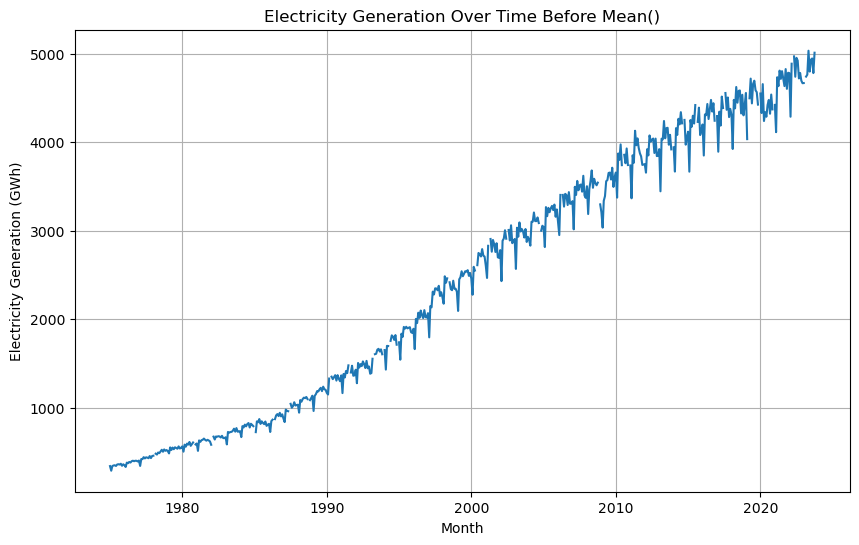

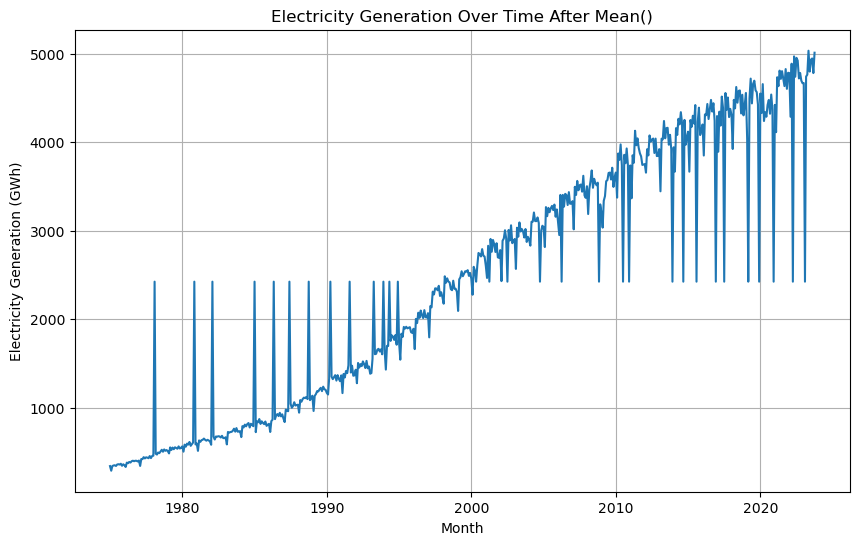

In [81]:
# Creating a copy of the DataFrame just to showcase
electricityGenerationMonthlyMean = pd.DataFrame(electricityGenerationMonthlyEdited).copy()

# Convert 'month' column to datetime format using to_timestamp
electricityGenerationMonthlyMean['month'] = pd.to_datetime(electricityGenerationMonthlyMean['month'].astype(str) + '-01')

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(electricityGenerationMonthlyMean['month'], electricityGenerationMonthlyMean['Electricity Generation (GWh)'], linestyle='-')
plt.title('Electricity Generation Over Time Before Mean()')
plt.xlabel('Month')
plt.ylabel('Electricity Generation (GWh)')
plt.grid(True)
plt.show()

# Fill NaN values using the mean of the column
mean_value = electricityGenerationMonthlyMean['Electricity Generation (GWh)'].mean()
electricityGenerationMonthlyMean['Electricity Generation (GWh)'].fillna(mean_value, inplace=True)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(electricityGenerationMonthlyMean['month'], electricityGenerationMonthlyMean['Electricity Generation (GWh)'], linestyle='-')
plt.title('Electricity Generation Over Time After Mean()')
plt.xlabel('Month')
plt.ylabel('Electricity Generation (GWh)')
plt.grid(True)
plt.show()

#### Showcase using bfill method

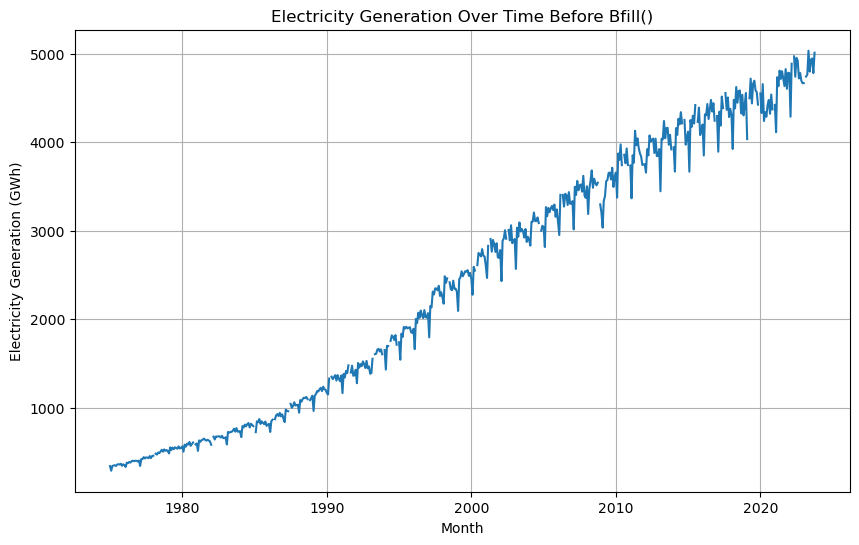

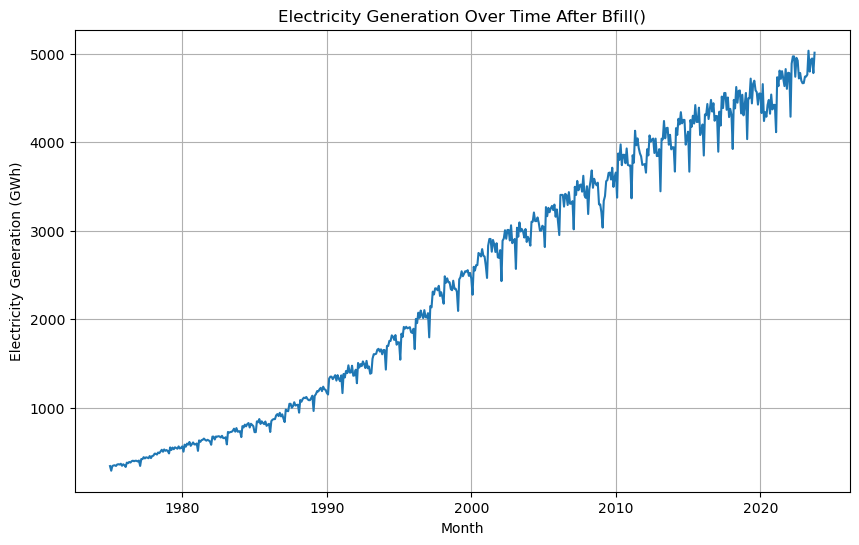

In [82]:
# Creating a copy of the DataFrame just to showcase
electricityGenerationMonthlyBfill = pd.DataFrame(electricityGenerationMonthlyEdited).copy()

# Convert 'month' column to datetime format using to_timestamp
electricityGenerationMonthlyBfill['month'] = pd.to_datetime(electricityGenerationMonthlyBfill['month'].astype(str) + '-01')

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(electricityGenerationMonthlyBfill['month'], electricityGenerationMonthlyBfill['Electricity Generation (GWh)'], linestyle='-')
plt.title('Electricity Generation Over Time Before Bfill()')
plt.xlabel('Month')
plt.ylabel('Electricity Generation (GWh)')
plt.grid(True)
plt.show()

# Fill NaN values using backfill
electricityGenerationMonthlyBfill.bfill(inplace=True)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(electricityGenerationMonthlyBfill['month'], electricityGenerationMonthlyBfill['Electricity Generation (GWh)'], linestyle='-')
plt.title('Electricity Generation Over Time After Bfill()')
plt.xlabel('Month')
plt.ylabel('Electricity Generation (GWh)')
plt.grid(True)
plt.show()

In [83]:
# Check for NaN values in the entire DataFrame
nan_values = electricityGenerationMonthlyEdited.isna().sum()

# Print the result
print("NaN values in the dataset before bfill:")
print(nan_values)

# Fill NaN values using backfill
electricityGenerationMonthlyEdited.bfill(inplace=True)

# Check for NaN values in the entire DataFrame after resolving the NaN to double confirm
nan_values = electricityGenerationMonthlyEdited.isna().sum()

# Print the result
print("\nNaN values in the dataset after bfill:")
print(nan_values)

NaN values in the dataset before bfill:
month                            0
Electricity Generation (GWh)    32
dtype: int64

NaN values in the dataset after bfill:
month                           0
Electricity Generation (GWh)    0
dtype: int64


***
We have just filled the NaN values of the 'Electricity Generation (Gigawatt Hours)' column using bfill(). I have chosen to use bfill() instead of other methods as looking at the trend of electricity generation over time, there is a common repeating trend of a short decrease followed by a larger increase in generation, with the general trend being an increasing trend. This shows that bfill() would be the best way to preserve the trend of the graph as mean() or mode() would take a common value which might break the trend of the graph, as seen from the showcase of the usage of mean() to resolve NaN values.
***

### Reducing the time range of the electricity generation monthly dataset

In [84]:
# Creating a copy of the DataFrame
electricityGenerationMonthlySubset = pd.DataFrame(electricityGenerationMonthlyEdited).copy()

# REDUCING THE MONTH RANGE OF THE DATASET
electricityGenerationMonthlySubset = reduce_month_range(electricityGenerationMonthlySubset, '2014-04', '2023-01')
print('The updated dataset within the specified date range:')
print(electricityGenerationMonthlySubset)

The updated dataset within the specified date range:
       month  Electricity Generation (GWh)
0    2014-04                        4081.8
1    2014-05                        4264.0
2    2014-06                        4201.0
3    2014-07                        4338.7
4    2014-08                        4212.2
..       ...                           ...
101  2022-09                        4720.0
102  2022-10                        4782.1
103  2022-11                        4694.7
104  2022-12                        4665.9
105  2023-01                        4667.5

[106 rows x 2 columns]


***
We have successfully subsetted the date range from 1975-01 to 2023-10, to a date range of 2014-04 to 2023-01.
***

### Analysis of the edited electricity generation monthly dataset

In [85]:
# Analysis of the edited electricity generation monthly dataset
print('*** Analysis of the edited electricity generation monthly dataset  ***\n')

# Describe the first & last 5 rows of the dataset
display_head_tail(electricityGenerationMonthlySubset)

# Describe the number of columns and rows in the dataset
display_dataframe_shape(electricityGenerationMonthlySubset)

# Describe the columns
display_dataframe_columns(electricityGenerationMonthlySubset)

# Describe the columns and their datatypes
display_dataframe_data_types(electricityGenerationMonthlySubset)

# Describe the number of non-NaN values
display_non_nan_counts(electricityGenerationMonthlySubset)

# Describe the info on the dataframe
display_dataframe_info(electricityGenerationMonthlySubset)

# Describe the minimum and maximum values of the mean_rh and the corresponding month
describe_min_max_values(electricityGenerationMonthlySubset, 'Electricity Generation (GWh)', 'Gigawatt Hours')

# # Describe the summary statistics of the dataframe
print_column_stats(electricityGenerationMonthlySubset, 'Electricity Generation (GWh)')

*** Analysis of the edited electricity generation monthly dataset  ***

The first 5 rows of the dataset are shown below:
      month  Electricity Generation (GWh)
0  2014-04                        4081.8
1  2014-05                        4264.0
2  2014-06                        4201.0
3  2014-07                        4338.7
4  2014-08                        4212.2

The last 5 rows of the dataset are shown below:
        month  Electricity Generation (GWh)
101  2022-09                        4720.0
102  2022-10                        4782.1
103  2022-11                        4694.7
104  2022-12                        4665.9
105  2023-01                        4667.5


There is a total of 106 rows and 2 columns in this dataset.


The Column names are:
- month
- Electricity Generation (GWh)

The data type of column "month" is period[M].
The data type of column "Electricity Generation (GWh)" is float64.

The number of non-NaN values in column "month" is 106.
The number of non-NaN values 

***
We have succesfully cleaned and preprocessed the dataset for use.
***

### Analysis of the historical 24hr PSI dataset

In [86]:
# Analysis of the historical 24hr PSI dataset dataset
print('*** Analysis of the historical 24hr PSI dataset  ***\n')

# Describe the first & last 5 rows of the dataset
display_head_tail(historical24hrPSI)

# Describe the number of columns and rows in the dataset
display_dataframe_shape(historical24hrPSI)

# Describe the columns
display_dataframe_columns(historical24hrPSI)

# Describe the columns and their datatypes
display_dataframe_data_types(historical24hrPSI)

# Describe the number of non-NaN values
display_non_nan_counts(historical24hrPSI)

# Describe the info on the dataframe
display_dataframe_info(historical24hrPSI)

*** Analysis of the historical 24hr PSI dataset  ***

The first 5 rows of the dataset are shown below:
        24-hr_psi  north  south  east  west  central
0  1/4/2014 1:00     55     54    54    58       54
1  1/4/2014 2:00     55     54    54    59       54
2  1/4/2014 3:00     55     55    54    60       55
3  1/4/2014 4:00     56     55    55    62       55
4  1/4/2014 5:00     57     55    56    63       56

The last 5 rows of the dataset are shown below:
               24-hr_psi  north  south  east  west  central
76722  31/12/2022 20:00     30     46    56    34       47
76723  31/12/2022 21:00     30     45    56    33       46
76724  31/12/2022 22:00     30     46    56    33       45
76725  31/12/2022 23:00     30     45    56    33       45
76726     1/1/2023 0:00     31     45    56    33       45


There is a total of 76727 rows and 6 columns in this dataset.


The Column names are:
- 24-hr_psi
- north
- south
- east
- west
- central

The data type of column "24-hr_psi" is 

***
From the analysis of the historical 24hr PSI dataset, we can see that the psi is measured every hour, meaning 24 readings per day, which is not what we are looking for. We are looking for a monthly reading to better match the time period we are aiming for. We can also see that the hourly PSI is measured at 5 different locations (North, South, East, West, Central) which is not what we want. We are looking for a total reading that can be representive of the PSI measured in Singapore. The dtype of the is also object which is not the dtype we want. There is also no NaN values so we do not need to do anything about that.
Therefore, we would need to do several things for this dataset:
- Convert the hourly format into a monthly format and change the dtype
- Convert the PSI by region to the average PSI for the whole of Singapore per month
- Subset the data date range as previously mentioned
***

### Converting the hourly format into a monthly format

In [87]:
# Creating a copy of the DataFrame 
historical24hrPSIEdited = pd.DataFrame(historical24hrPSI).copy()

historical24hrPSIEdited['24-hr_psi'] = pd.to_datetime(historical24hrPSIEdited['24-hr_psi'], format='%d/%m/%Y %H:%M')
historical24hrPSIEdited['month'] = historical24hrPSIEdited['24-hr_psi'].apply(lambda x: datetime.strftime(x, '%Y-%m'))

# Calculate the mean PSI for each region and for each month
historical24hrPSIEdited = historical24hrPSIEdited.groupby('month').mean()

# Drop the 24-hr_psi column and replace it with the month column
historical24hrPSIEdited = historical24hrPSIEdited.drop(columns=['24-hr_psi'])
historical24hrPSIEdited.reset_index(inplace=True)
print(historical24hrPSIEdited)

# Convert the 'Month' column to period[M]
historical24hrPSIEdited['month'] = pd.to_datetime(historical24hrPSIEdited['month']).dt.to_period('M')

# Describe the info on the dataframe
display_dataframe_info(historical24hrPSIEdited)

       month      north      south       east       west    central
0    2014-04  61.285118  57.794159  59.285118  59.470097  59.347705
1    2014-05  56.014785  49.682796  49.362903  54.034946  52.213710
2    2014-06  51.231944  48.602778  47.402778  53.206944  49.166667
3    2014-07  54.758065  52.810484  51.768817  55.678763  52.532258
4    2014-08  51.924731  49.311828  47.612903  53.521505  49.658602
..       ...        ...        ...        ...        ...        ...
101  2022-09  47.234722  43.975000  47.711111  44.775000  46.873611
102  2022-10  33.383065  38.498656  41.096774  24.872312  37.849462
103  2022-11  24.458333  37.240278  44.356944  30.454167  34.638889
104  2022-12  24.440860  37.768817  43.983871  28.553763  33.504032
105  2023-01  31.000000  45.000000  56.000000  33.000000  45.000000

[106 rows x 6 columns]

Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtyp

***
We have just converted the hourly psi reading into a monthly psi reading. We have also just converted the month column into the desired format, from for example 1/4/2014 to 2014-04, and from a dtype object, to a dtype period[M]. We will be finding the average across all regions next.
***

### Finding average of the PSI across all regions per month

In [88]:
# Sum up the values for each row
historical24hrPSIEdited['total_psi'] = historical24hrPSIEdited[['north', 'south', 'east', 'west', 'central']].sum(axis=1)

# Calculate the average as a new column 'singaporePSI'
historical24hrPSIEdited['singapore_psi'] = historical24hrPSIEdited['total_psi'] / 5

# Drop the 'north', 'south', 'east', 'west', and 'central' and 'total_psi' columns
historical24hrPSIEdited.drop(columns=['north', 'south', 'east', 'west', 'central', 'total_psi'], inplace=True)

print(historical24hrPSIEdited)

       month  singapore_psi
0    2014-04      59.436439
1    2014-05      52.261828
2    2014-06      49.922222
3    2014-07      53.509677
4    2014-08      50.405914
..       ...            ...
101  2022-09      46.113889
102  2022-10      35.140054
103  2022-11      34.229722
104  2022-12      33.650269
105  2023-01      42.000000

[106 rows x 2 columns]


***
We have just found the average PSI from the total of the 5 regions in Singapore. This is what we need as it is a general representative of the PSI across all of Singapore.
***

### Reducing the time range of the historical 24hr PSI dataset

In [89]:
# Creating a copy of the DataFrame
historical24hrPSISubset = pd.DataFrame(historical24hrPSIEdited).copy()

# REDUCING THE MONTH RANGE OF THE DATASET
historical24hrPSISubset = reduce_month_range(historical24hrPSISubset, '2014-04', '2023-01')
print('The updated dataset within the specified date range:')
print(historical24hrPSISubset)

The updated dataset within the specified date range:
       month  singapore_psi
0    2014-04      59.436439
1    2014-05      52.261828
2    2014-06      49.922222
3    2014-07      53.509677
4    2014-08      50.405914
..       ...            ...
101  2022-09      46.113889
102  2022-10      35.140054
103  2022-11      34.229722
104  2022-12      33.650269
105  2023-01      42.000000

[106 rows x 2 columns]


***
We have successfully subsetted the date range from 2014-04 to 2023-01, to a date range of 2014-04 to 2023-01.
***

### Analysis of the edited historical 24hr PSI dataset

In [90]:
# Analysis of the edited historical 24hr PSI dataset
print('*** Analysis of the edited historical 24hr PSI dataset  ***\n')

# Describe the first & last 5 rows of the dataset
display_head_tail(historical24hrPSISubset)

# Describe the number of columns and rows in the dataset
display_dataframe_shape(historical24hrPSISubset)

# Describe the columns
display_dataframe_columns(historical24hrPSISubset)

# Describe the columns and their datatypes
display_dataframe_data_types(historical24hrPSISubset)

# Describe the number of non-NaN values
display_non_nan_counts(historical24hrPSISubset)

# Describe the info on the dataframe
display_dataframe_info(historical24hrPSISubset)

# Describe the minimum and maximum values of the mean_rh and the corresponding month
describe_min_max_values(historical24hrPSISubset, 'singapore_psi', 'PSI')

# # Describe the summary statistics of the dataframe
print_column_stats(historical24hrPSISubset, 'singapore_psi')

*** Analysis of the edited historical 24hr PSI dataset  ***

The first 5 rows of the dataset are shown below:
      month  singapore_psi
0  2014-04      59.436439
1  2014-05      52.261828
2  2014-06      49.922222
3  2014-07      53.509677
4  2014-08      50.405914

The last 5 rows of the dataset are shown below:
        month  singapore_psi
101  2022-09      46.113889
102  2022-10      35.140054
103  2022-11      34.229722
104  2022-12      33.650269
105  2023-01      42.000000


There is a total of 106 rows and 2 columns in this dataset.


The Column names are:
- month
- singapore_psi

The data type of column "month" is period[M].
The data type of column "singapore_psi" is float64.

The number of non-NaN values in column "month" is 106.
The number of non-NaN values in column "singapore_psi" is 106.


Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype    
---  ------   

***
We have succesfully cleaned and preprocessed the dataset for use.
***

### Analysis of the Surface Air Temperature Monthly Mean dataset

In [91]:
# Analysis of the Surface Air Temperature Monthly Mean dataset
print('*** Analysis of the Surface Air Temperature Monthly Mean dataset  ***\n')

# Describe the first & last 5 rows of the dataset
display_head_tail(surfaceAirTemperatureMonthlyMean)

# Describe the number of columns and rows in the dataset
display_dataframe_shape(surfaceAirTemperatureMonthlyMean)

# Describe the columns
display_dataframe_columns(surfaceAirTemperatureMonthlyMean)

# Describe the columns and their datatypes
display_dataframe_data_types(surfaceAirTemperatureMonthlyMean)

# Describe the number of non-NaN values
display_non_nan_counts(surfaceAirTemperatureMonthlyMean)

# Describe the info on the dataframe
display_dataframe_info(surfaceAirTemperatureMonthlyMean)

# Describe the minimum and maximum values of the mean_rh and the corresponding month
describe_min_max_values(surfaceAirTemperatureMonthlyMean, 'mean_temp', '°C')

# # Describe the summary statistics of the dataframe
print_column_stats(surfaceAirTemperatureMonthlyMean, 'mean_temp')

*** Analysis of the Surface Air Temperature Monthly Mean dataset  ***

The first 5 rows of the dataset are shown below:
      month  mean_temp
0  1982-01       25.9
1  1982-02       27.1
2  1982-03       27.2
3  1982-04       27.0
4  1982-05       28.0

The last 5 rows of the dataset are shown below:
        month  mean_temp
499  2023-08       28.7
500  2023-09       28.7
501  2023-10       29.0
502  2023-11       27.9
503  2023-12       27.3


There is a total of 504 rows and 2 columns in this dataset.


The Column names are:
- month
- mean_temp

The data type of column "month" is object.
The data type of column "mean_temp" is float64.

The number of non-NaN values in column "month" is 504.
The number of non-NaN values in column "mean_temp" is 504.


Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   month      504 non-null    o

From the analysis of the surface air temperature monthly mean dataset, we can see that the dtype of month is object which is not what we want. We can also see that there is no NaN values so there is no need to do anything about it. Therefore, we would need to do several things for this dataset:
- Convert the dtype of the month column to Period[M]
- Subset the data date range as previously mentioned

### Converting the month dtype

In [92]:
# Creating a copy of the DataFrame 
surfaceAirTemperatureMonthlyMeanEdited = pd.DataFrame(surfaceAirTemperatureMonthlyMean).copy()

# Convert the 'Month' column to period[M]
surfaceAirTemperatureMonthlyMeanEdited['month'] = pd.to_datetime(surfaceAirTemperatureMonthlyMeanEdited['month']).dt.to_period('M')

# Describe the info on the dataframe
display_dataframe_info(surfaceAirTemperatureMonthlyMeanEdited)


Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   month      504 non-null    period[M]
 1   mean_temp  504 non-null    float64  
dtypes: float64(1), period[M](1)
memory usage: 8.0 KB
None



***
We have just converted the dtype of month column from object to period[M] which is what we need.
***

### Reducing the time range of the surface air temperature monthly mean dataset

In [93]:
# Creating a copy of the DataFrame
surfaceAirTemperatureMonthlyMeanSubset = pd.DataFrame(surfaceAirTemperatureMonthlyMeanEdited).copy()

# REDUCING THE MONTH RANGE OF THE DATASET
surfaceAirTemperatureMonthlyMeanSubset = reduce_month_range(surfaceAirTemperatureMonthlyMeanSubset, '2014-04', '2023-01')
print('The updated dataset within the specified date range:')
print(surfaceAirTemperatureMonthlyMeanSubset)

The updated dataset within the specified date range:
       month  mean_temp
0    2014-04       28.2
1    2014-05       28.6
2    2014-06       29.0
3    2014-07       28.7
4    2014-08       27.7
..       ...        ...
101  2022-09       27.9
102  2022-10       27.6
103  2022-11       27.4
104  2022-12       26.8
105  2023-01       26.5

[106 rows x 2 columns]


***
We have successfully subsetted the date range from 1982-01 to 2023-12, to a date range of 2014-04 to 2023-01.
***

### Analysis of the edited surface air temperature monthly mean dataset

In [94]:
# Analysis of the edited historical 24hr PSI dataset
print('*** Analysis of the edited surface air temperature monthly dataset  ***\n')

# Describe the first & last 5 rows of the dataset
display_head_tail(surfaceAirTemperatureMonthlyMeanSubset)

# Describe the number of columns and rows in the dataset
display_dataframe_shape(surfaceAirTemperatureMonthlyMeanSubset)

# Describe the columns
display_dataframe_columns(surfaceAirTemperatureMonthlyMeanSubset)

# Describe the columns and their datatypes
display_dataframe_data_types(surfaceAirTemperatureMonthlyMeanSubset)

# Describe the number of non-NaN values
display_non_nan_counts(surfaceAirTemperatureMonthlyMeanSubset)

# Describe the info on the dataframe
display_dataframe_info(surfaceAirTemperatureMonthlyMeanSubset)

# Describe the minimum and maximum values of the mean_rh and the corresponding month
describe_min_max_values(surfaceAirTemperatureMonthlyMeanSubset, 'mean_temp', '°C')

# # Describe the summary statistics of the dataframe
print_column_stats(surfaceAirTemperatureMonthlyMeanSubset, 'mean_temp')

*** Analysis of the edited surface air temperature monthly dataset  ***

The first 5 rows of the dataset are shown below:
      month  mean_temp
0  2014-04       28.2
1  2014-05       28.6
2  2014-06       29.0
3  2014-07       28.7
4  2014-08       27.7

The last 5 rows of the dataset are shown below:
        month  mean_temp
101  2022-09       27.9
102  2022-10       27.6
103  2022-11       27.4
104  2022-12       26.8
105  2023-01       26.5


There is a total of 106 rows and 2 columns in this dataset.


The Column names are:
- month
- mean_temp

The data type of column "month" is period[M].
The data type of column "mean_temp" is float64.

The number of non-NaN values in column "month" is 106.
The number of non-NaN values in column "mean_temp" is 106.


Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   month      106 non-

***
We have succesfully cleaned and preprocessed the dataset for use.
***

### Visualizing the datasets to check for outliers

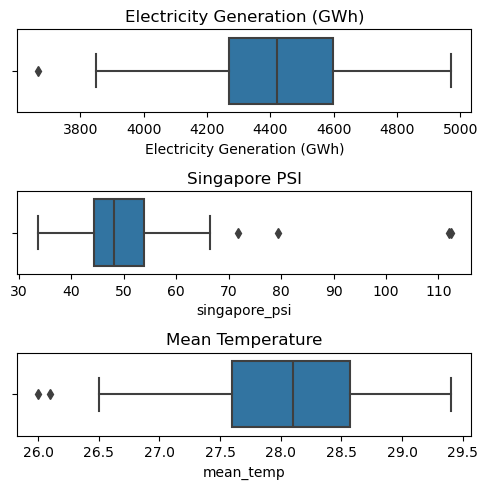

In [95]:
# Create subplots using seaborn
fig, axs = plt.subplots(3, 1, figsize=(5, 5))

# Plot boxplot for Electricity Generation using seaborn
sns.boxplot(x='Electricity Generation (GWh)', data=electricityGenerationMonthlySubset, ax=axs[0])
axs[0].set_title('Electricity Generation (GWh)')

# Plot boxplot for singapore_psi using seaborn
sns.boxplot(x='singapore_psi', data=historical24hrPSISubset, ax=axs[1])
axs[1].set_title('Singapore PSI')

# Plot boxplot for mean_temp using seaborn
sns.boxplot(x='mean_temp', data=surfaceAirTemperatureMonthlyMeanSubset, ax=axs[2])
axs[2].set_title('Mean Temperature')

# Adjust layout
plt.tight_layout()
plt.show()

***
Visualising the datasts, we can see that there are obvious outliers within the datasets. We will need to solve the outliers for regression.
***

In [96]:
# Removing outliers from electricity generation dataset
handle_outliers(electricityGenerationMonthlySubset, 'Electricity Generation (GWh)')

# Removing outliers from psi dataset
handle_outliers(historical24hrPSISubset, 'singapore_psi')

# Removing outliers from temperature dataset
handle_outliers(surfaceAirTemperatureMonthlyMeanSubset, 'mean_temp')

Outliers:
      month  Electricity Generation (GWh)
10  2015-02                        3666.9
Outliers:
      month  singapore_psi
6   2014-10      71.870699
17  2015-09     112.027222
18  2015-10     112.311022
65  2019-09      79.475556
Outliers:
      month  mean_temp
45  2018-01       26.1
81  2021-01       26.0


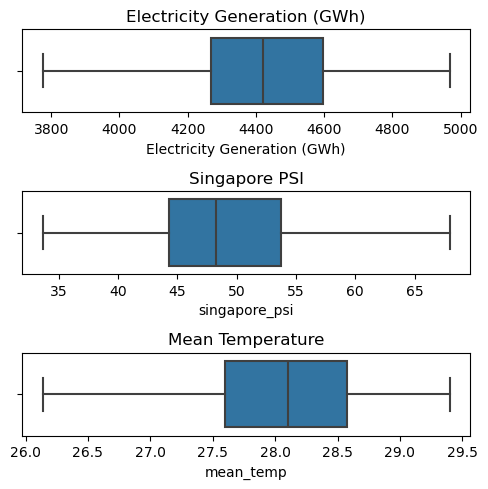

In [97]:
# Create subplots using seaborn
fig, axs = plt.subplots(3, 1, figsize=(5, 5))

# Plot boxplot for Electricity Generation using seaborn
sns.boxplot(x='Electricity Generation (GWh)', data=electricityGenerationMonthlySubset, ax=axs[0])
axs[0].set_title('Electricity Generation (GWh)')

# Plot boxplot for singapore_psi using seaborn
sns.boxplot(x='singapore_psi', data=historical24hrPSISubset, ax=axs[1])
axs[1].set_title('Singapore PSI')

# Plot boxplot for mean_temp using seaborn
sns.boxplot(x='mean_temp', data=surfaceAirTemperatureMonthlyMeanSubset, ax=axs[2])
axs[2].set_title('Mean Temperature')

# Adjust layout
plt.tight_layout()
plt.show()

### Regression Analysis using Statsmodels

#### Choosing between simple linear regression & multiple linear regession

- Simple linear regression
    - Relationship between just two variables (one dependent and one independent)
    - Y = M*X +C
        - M is the effect that X (the independent variable) has on Y (the dependent variable). In other words, it represents the change in Y due to a unit change in X (if everything else is constant)
        - C is called the Y-intercept or constant coefficient. This means, if X is zero, then the expected output Y would be equal to C
- Multiple linear regression
    - Relationship between more than two variables (one dependent and more than one independent)
    - Y = C + M1*X1 + M2*X2 + …
        - X1, X2, X3, etc. are independent variables
        - M1, M2, M3, etc. are coefficients corresponding to X1, X2, X3, etc.
        - C is called the constant coefficient.       


Looking at our problem statement, does an increase in electricity generation correlate with negative environmental impacts such as the increase of air pollution levels (PSI) and the climate change such as temperature in Singapore? This means that the electricity generation is the independent variable and negative environmental impacts such as PSI and temperature are the dependent variables. While there is a way to use multiple dependent variables (Refer to note), it is not under statsmodel.

Hence, I have chosen to use simple linear regression for this analysis. In this case, I would need to do 2 simple regression analysis to analyse both datasets with electricity generation to answer my problem statement.

Note: There is a linear regression called "Multivariate Multiple Regression" that allows for the use of multiple dependent variables. The methods are called Seemingly Unrelated Regression (SUR) or use a multivariate method such as MANOVA. However, these are not under statsmodel and hence cannot be user for the CA2 purpose.

#### Merging the datasets

In [98]:
# Merging the electricity and psi datasets
electricity_Psi_merge = pd.merge(electricityGenerationMonthlySubset, historical24hrPSISubset, on='month')

# Merging the already merged dataset with the air temperature dataset
electricity_Psi_Tempereature_merge = pd.merge(electricity_Psi_merge, surfaceAirTemperatureMonthlyMeanSubset, on='month')

# Show the merged dataset
print(electricity_Psi_Tempereature_merge)

       month  Electricity Generation (GWh)  singapore_psi  mean_temp
0    2014-04                        4081.8      59.436439       28.2
1    2014-05                        4264.0      52.261828       28.6
2    2014-06                        4201.0      49.922222       29.0
3    2014-07                        4338.7      53.509677       28.7
4    2014-08                        4212.2      50.405914       27.7
..       ...                           ...            ...        ...
101  2022-09                        4720.0      46.113889       27.9
102  2022-10                        4782.1      35.140054       27.6
103  2022-11                        4694.7      34.229722       27.4
104  2022-12                        4665.9      33.650269       26.8
105  2023-01                        4667.5      42.000000       26.5

[106 rows x 4 columns]


***
We first need to merge the 3 datasets that we have preprocessed into a single dataset before doing regression analysis.
***

#### Regression analysis of Singapore PSI against electricity generation

In [99]:
# Define the independent variable
X = electricity_Psi_Tempereature_merge['Electricity Generation (GWh)']
X = sm.add_constant(X)

# Conduct the regression for singapore_psi
Y1 = electricity_Psi_Tempereature_merge['singapore_psi']
model1 = sm.OLS(Y1, X)
results1 = model1.fit()
print("Regression results for singapore_psi:")
print(results1.summary())

Regression results for singapore_psi:
                            OLS Regression Results                            
Dep. Variable:          singapore_psi   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     7.474
Date:                Tue, 13 Feb 2024   Prob (F-statistic):            0.00736
Time:                        10:50:27   Log-Likelihood:                -356.31
No. Observations:                 106   AIC:                             716.6
Df Residuals:                     104   BIC:                             721.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [106]:
import statsmodels.formula.api as smf

# Define the formula for the model
formula = 'singapore_psi ~ Q("Electricity Generation (GWh)")'

# Conduct the regression
model1 = smf.ols(formula, data=electricity_Psi_Tempereature_merge)
results1 = model1.fit()

print("Regression results for singapore_psi:")
print(results1.summary())

Regression results for singapore_psi:
                            OLS Regression Results                            
Dep. Variable:          singapore_psi   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     7.474
Date:                Tue, 13 Feb 2024   Prob (F-statistic):            0.00736
Time:                        11:05:29   Log-Likelihood:                -356.31
No. Observations:                 106   AIC:                             716.6
Df Residuals:                     104   BIC:                             721.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

***
This is an output of an Ordinary Least Squares (OLS) regression analysis. Here's how to interpret the key components:

- R-squared value: This is a statistical measure of how well the regression line fits with the real data points. The higher the value, the better the fit.
    - The value is 0.067 which means it is a good fit.
- Adj, R-squared: This is the corrected R-squared value according to the number of input features. Ideally, it should be close to the R-squareds value.
    - The value is 0.058.
- Coefficient: This gives the ‘M’ value for the regression line. It tells how much the Y changes with a unit change in X. A positive value means that the two variables are directly proportional. A negative value, however, would have meant that the two variables are inversely proportional to each other.
    - The value is -0.0075 which means the 2 variables are inversely proportional to each other.
- Std error:  This tells us how accurate our coefficient value is. The lower the standard error, the higher the accuracy.
    - The value is 0.003 which means that the standard error is low and accuracy is high.
- P >|t| : This is the p-value. It tells us how statistically significant X are to Y. A value less than 0.05 usually means that it is quite significant.
    - The value is 0.007 which means that the it is significant.

In summary, this model explains about 5.8% of the variance in `singapore_psi` and suggests that `Electricity Generation (GWh)` significantly predicts `singapore_psi`.
***

#### Hypothesis for the regression analysis of electricity generation in Singapore and Singapore PSI

- Null hypothesis (H0): 
    - There is no relationship between electrical generation and Singapore PSI.
- Alternative hypothesis (Ha): 
    - There is a relationship between electrical generation and Singapore PSI.

Assuming we will take our significance level (alpha) to be 0.05, we reject the null hypothesis and accept the alternative hypothesis as p = 0.007<0.05. so, we can say that there is indeed a relationship between electrical generation in Singapore and Singapore PSI.


#### Making predictions of electricity generation and PSI

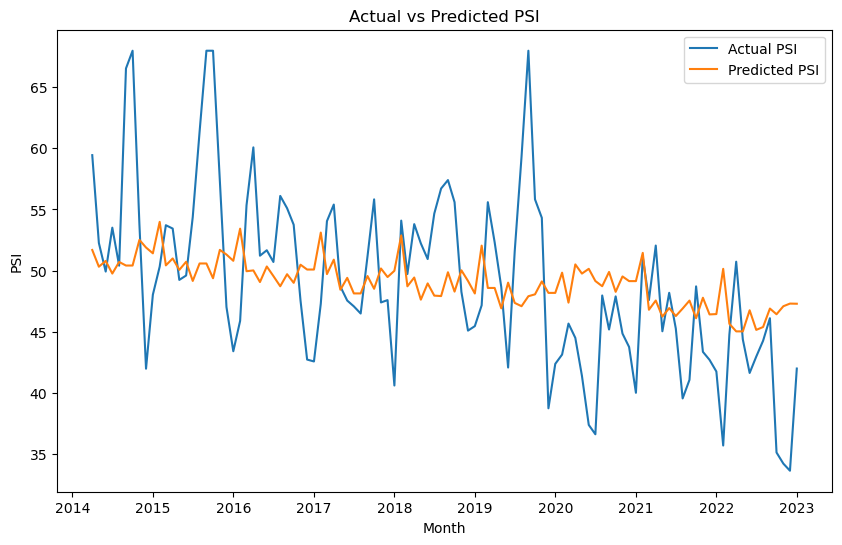

In [100]:
# Creating a copy of the DataFrame
electricity_Psi_Tempereature_copy = pd.DataFrame(electricity_Psi_Tempereature_merge).copy()

# Predicting the values using the model
electricity_Psi_Tempereature_copy['predicted_psi'] = results1.predict(X)
electricity_Psi_Tempereature_copy['month'] = electricity_Psi_Tempereature_copy['month'].dt.to_timestamp()

# Visualising the predictions
plt.figure(figsize=(10,6))
plt.plot(electricity_Psi_Tempereature_copy['month'], electricity_Psi_Tempereature_copy['singapore_psi'], label='Actual PSI')
plt.plot(electricity_Psi_Tempereature_copy['month'], electricity_Psi_Tempereature_copy['predicted_psi'], label='Predicted PSI')
plt.xlabel('Month')
plt.ylabel('PSI')
plt.title('Actual vs Predicted PSI')
plt.legend()
plt.show()

***
From this, we can see that the prediction model is not really accurate as the predicited PSI is very far off the actual PSI.
***

#### Regression analysis of surface temperature against electricity generation

In [101]:
# Conduct the regression for mean_temp
Y2 = electricity_Psi_Tempereature_merge['mean_temp']
model2 = sm.OLS(Y2, X)
results2 = model2.fit()
print("\nRegression results for mean_temp:")
print(results2.summary())


Regression results for mean_temp:
                            OLS Regression Results                            
Dep. Variable:              mean_temp   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     5.222
Date:                Tue, 13 Feb 2024   Prob (F-statistic):             0.0243
Time:                        10:50:27   Log-Likelihood:                -110.42
No. Observations:                 106   AIC:                             224.8
Df Residuals:                     104   BIC:                             230.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

***
This is another output of an Ordinary Least Squares (OLS) regression analysis. Here's how to interpret the key components:

- R-squared value: This is a statistical measure of how well the regression line fits with the real data points. The higher the value, the better the fit.
    - The value is 0.048 which means it is not that good of a fit.
- Adj, R-squared: This is the corrected R-squared value according to the number of input features. Ideally, it should be close to the R-squareds value.
    - The value is 0.039.
- Coefficient: This gives the ‘M’ value for the regression line. It tells how much the Y changes with a unit change in X. A positive value means that the two variables are directly proportional. A negative value, however, would have meant that the two variables are inversely proportional to each other.
    - The value is 0.0006 which means the 2 variables are proportional to each other.
- Std error:  This tells us how accurate our coefficient value is. The lower the standard error, the higher the accuracy.
    - The value is 0.000 which means that the standard error is low and accuracy is high.
- P >|t| : This is the p-value. It tells us how statistically significant X are to Y. A value less than 0.05 usually means that it is quite significant.
    - The value is 0.024 which means that the it is significant.

In summary, this model explains about 4.8% of the variance in `mean_temp` and suggests that `Electricity Generation (GWh)` significantly predicts `mean_temp`.
***

### Hypothesis for the regression analysis of electrical generation in Singapore and Singapore PSI

- Null hypothesis (H0): 
    - There is no relationship between electrical generation and Singapore temperature.
- Alternative hypothesis (Ha): 
    - There is a relationship between electrical generation and Singapore temperature.

Assuming we will take our significance level (alpha) to be 0.05, we reject the null hypothesis and accept the alternative hypothesis as p = 0.048<0.05. so, we can say that there is indeed a relationship between electrical generation and temperature in Singapore.
***

#### Making predictions of electricity generation and temperature

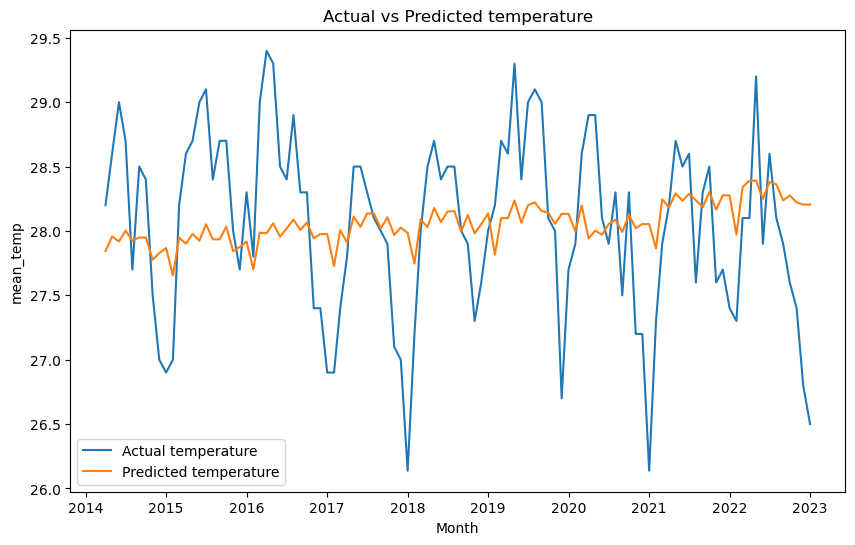

In [102]:
# Making predictions
electricity_Psi_Tempereature_copy['predicted_temp'] = results2.predict(X)

# Visualising the predictions
plt.figure(figsize=(10,6))
plt.plot(electricity_Psi_Tempereature_copy['month'], electricity_Psi_Tempereature_copy['mean_temp'], label='Actual temperature')
plt.plot(electricity_Psi_Tempereature_copy['month'], electricity_Psi_Tempereature_copy['predicted_temp'], label='Predicted temperature')
plt.xlabel('Month')
plt.ylabel('mean_temp')
plt.title('Actual vs Predicted temperature')
plt.legend()
plt.show()

***
From this, we can see that the prediction model is not really accurate as the predicited temperature is very far off the actual temperature.
***

### Predictions and insights
***
- These are the predictions after conducting regression analysis and fitting the model to random values of electrical generation in the future.
- We can see that the regression model we have done is not a good indicator of future environmental impacts. It could be because electricity generation is not the only contributing factor to environmental imapcts.
***

### Conclusion
***
- In conclusion, the correlation between electricity generation and prevailing environmental impacts might be present but it also can vary based on multiple factors, 
    - renewable energy
        - Renewable energy such as solar energy might not have a large impact on the environment yet it is included in the total amount of electricity generated
    - air pollution (PSI)
        - PSI might not only be caused by electricity generation alone, but can be from other sources as well such as personal vehicles on the road.
    - climate change such as temperature
        - Other countries might have a larger impact on climate change than Singapore as Singapore is such as small country.
***